<a href="https://colab.research.google.com/github/HoangNgTuan/Assignment_2/blob/patch-1/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import glob
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import numpy as np

In [21]:
img_list = glob.glob('Test/*.jpg')

class ImgsDataset(Dataset):
  def __init__(self, image_list, transforms =None):
    self.image_list = image_list
    self.transforms = transforms
  def __len__(self):
    return len(self.image_list)
  def __getitem__(self,i):
    img=plt.imread(self.image_list[i])
    img=Image.fromarray(img).convert('RGB')
    img=np.array(img).astype(np.uint8)

    if self.transforms is not None:
      img=self.transforms(img)
    return torch.tensor(img,dtype=torch.float)



def show_img(img):
  plt.figure(figsize=(40,38))
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

## Image Rotation

In [12]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),
                              transforms.RandomRotation(50,expand=True),  
                              transforms.Resize((164,164)),
                              transforms.ToTensor(),
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


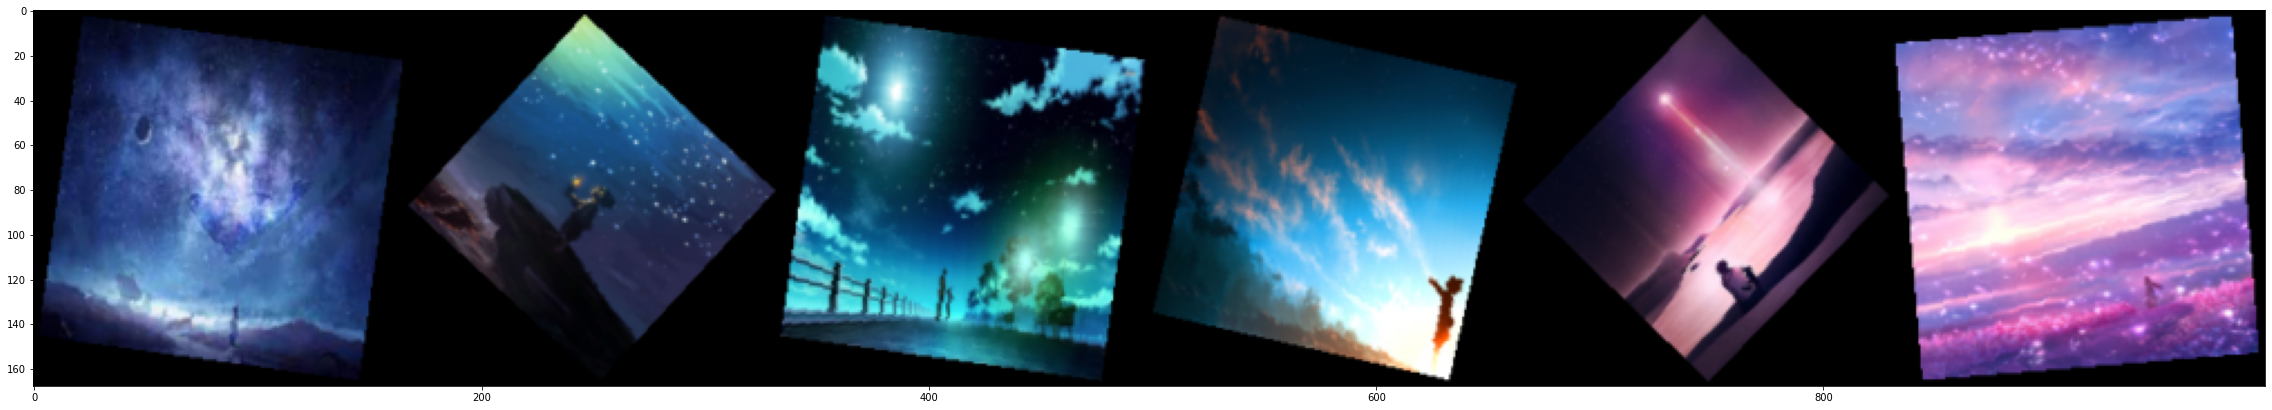

In [22]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)


show_img(torchvision.utils.make_grid(data.next()))

## Random Cropping

In [26]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.RandomCrop((120,120)),        
                              transforms.ToTensor(),
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


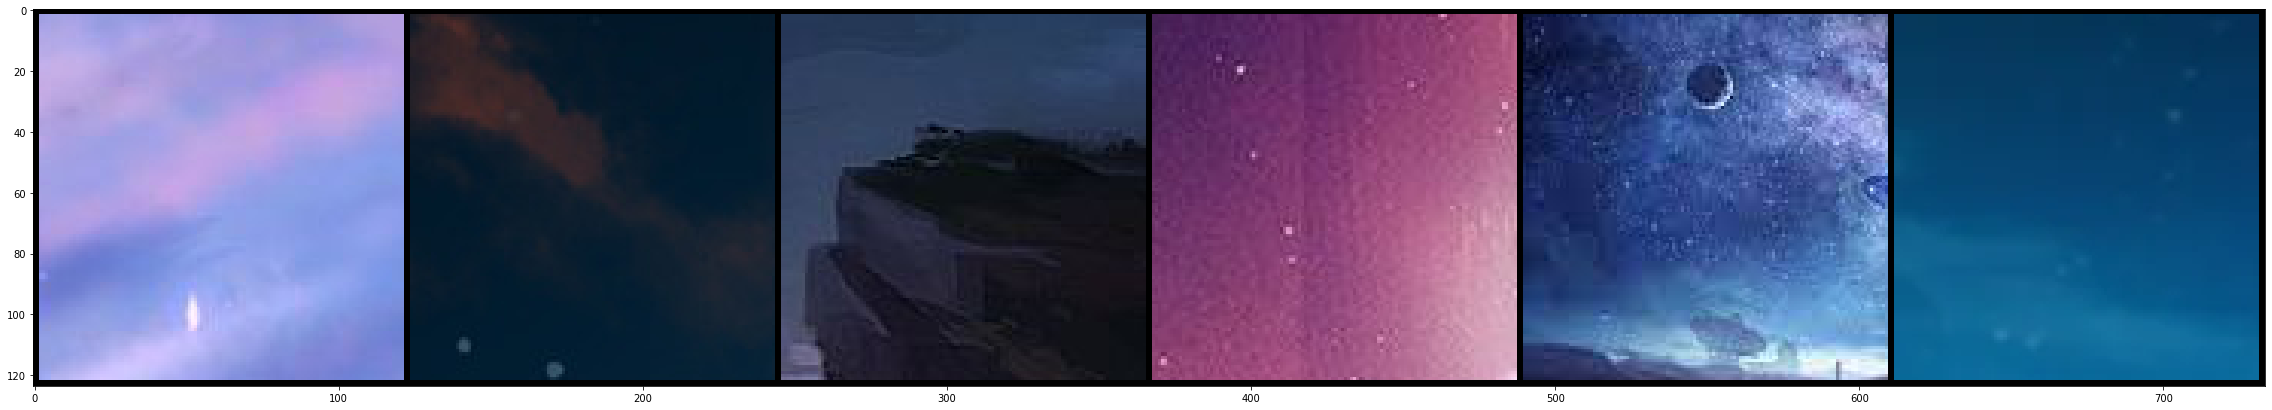

In [27]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Fliping Images

In [28]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),
                              transforms.RandomVerticalFlip(0.4), 
                              transforms.RandomHorizontalFlip(0.4),        
                              transforms.ToTensor(),
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


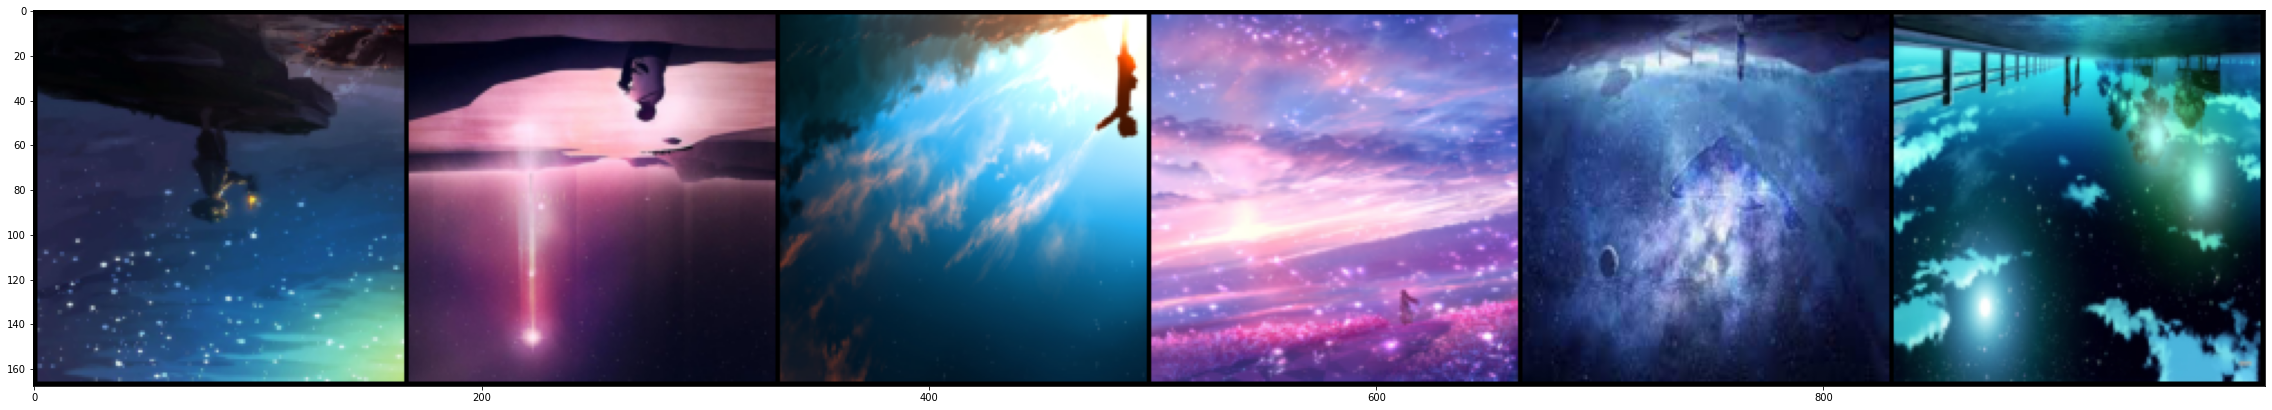

In [29]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Brightness, Contrast, Saturation, Hue

In [32]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),
                              transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0, hue=0),
                              transforms.ToTensor(),
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


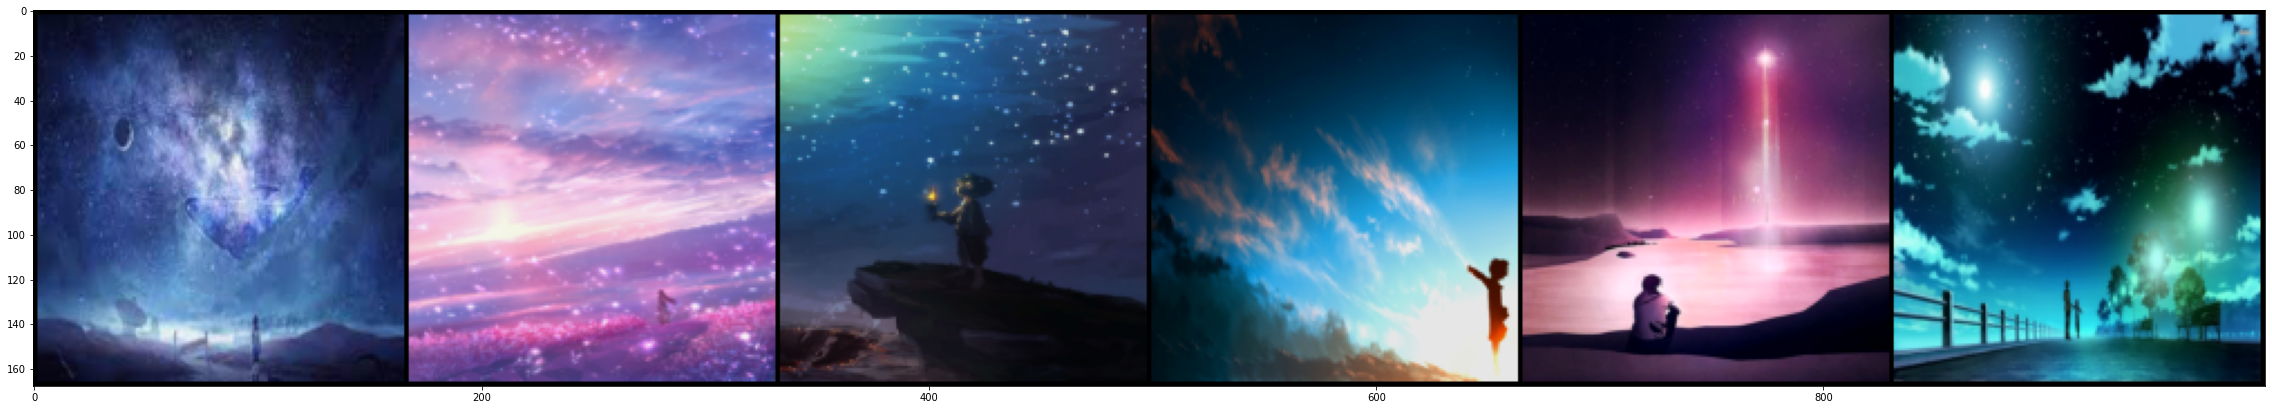

In [33]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Gaussian Noise to Images

In [36]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [37]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),
                              transforms.ToTensor(),
                              AddGaussianNoise(0.1, 0.08)
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


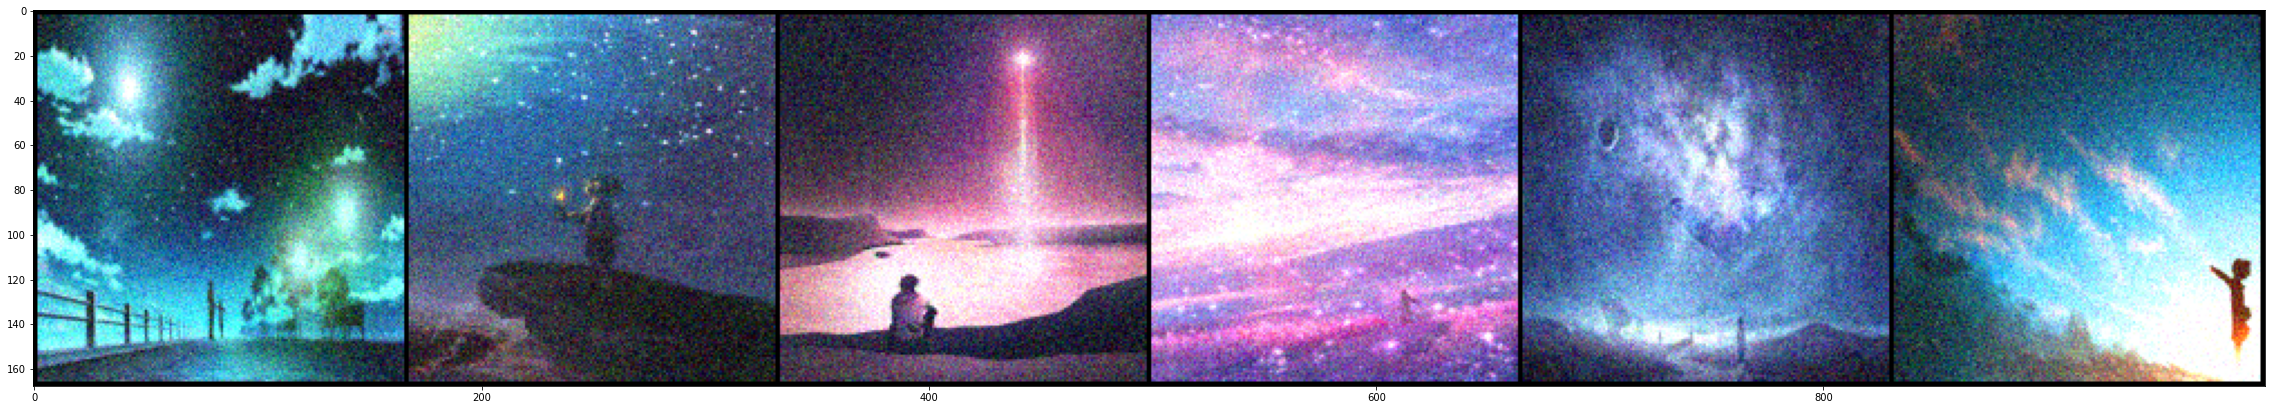

In [38]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Random Erasing

In [39]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),   
                              transforms.ToTensor(),
                              transforms.RandomErasing(),  
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


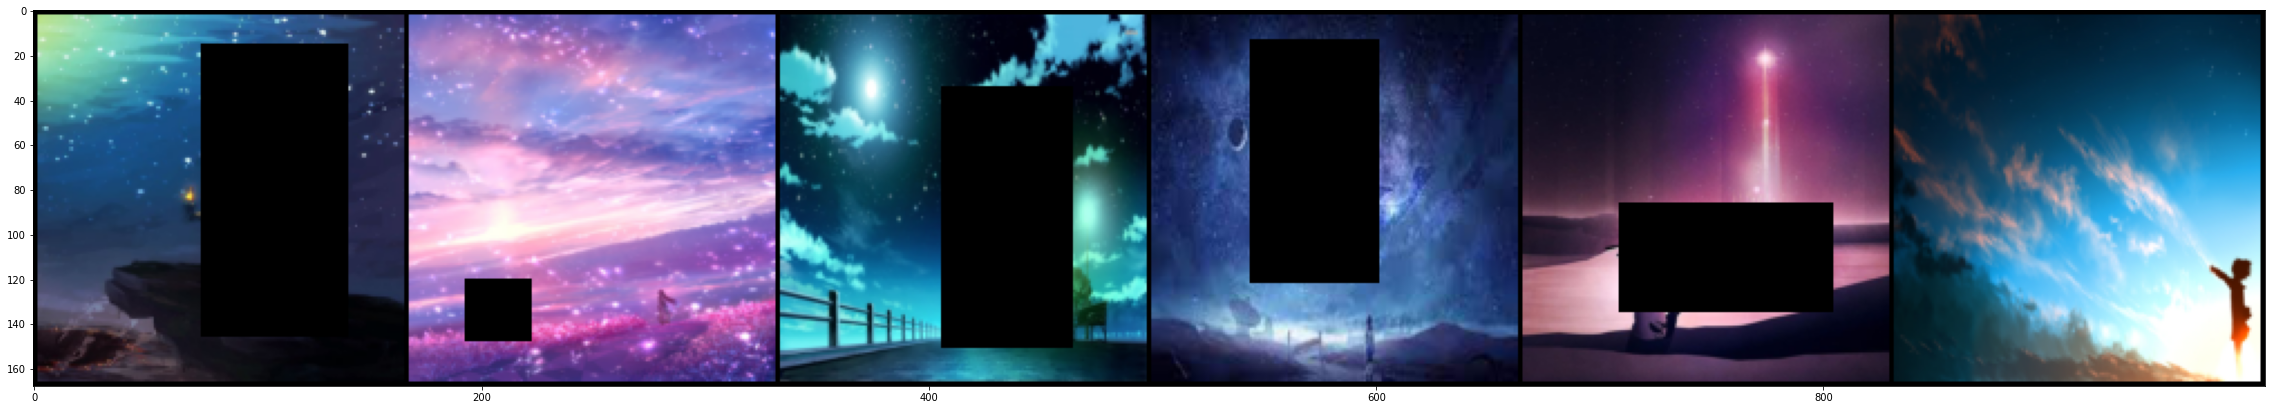

In [40]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Random Crop

In [64]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)), 
                              transforms.Pad(padding = (2,2), fill=0, padding_mode = 'constant'),  
                              transforms.ToTensor(),
                              transforms.RandomCrop(82),  
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


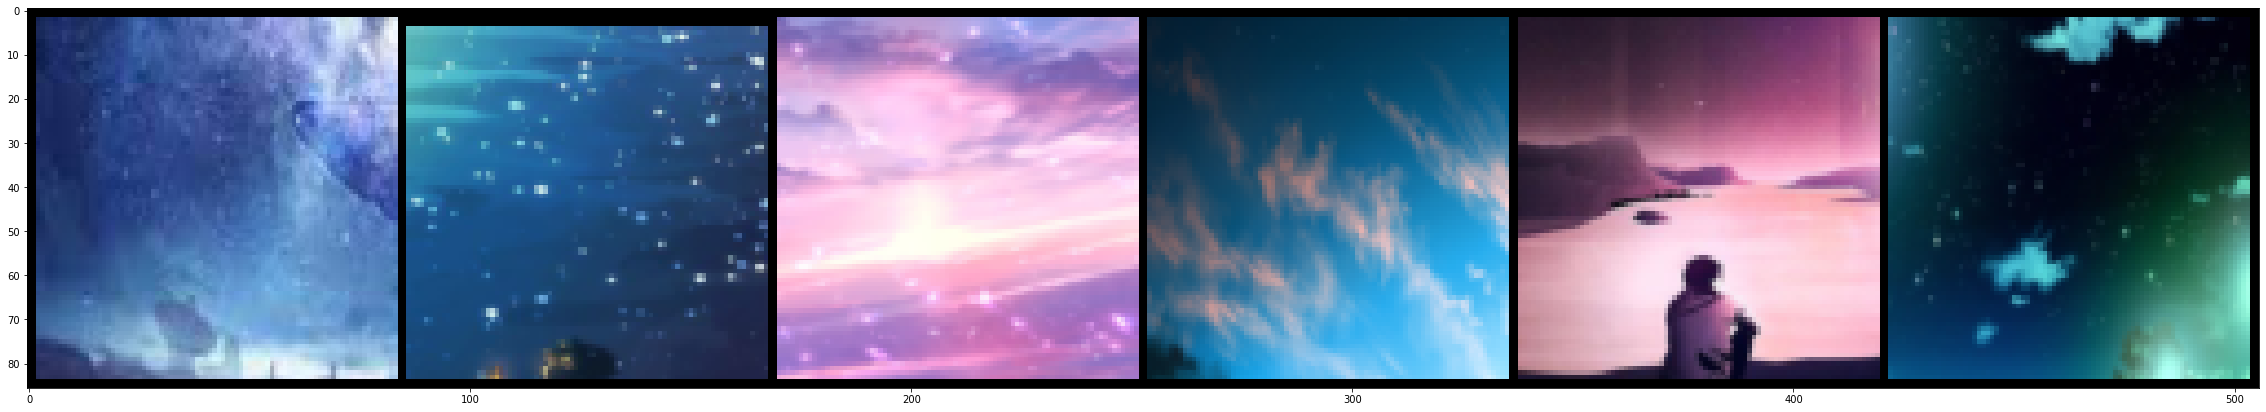

In [65]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Random Affine

In [52]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),   
                              transforms.ToTensor(),
                              transforms.RandomAffine(60),  
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


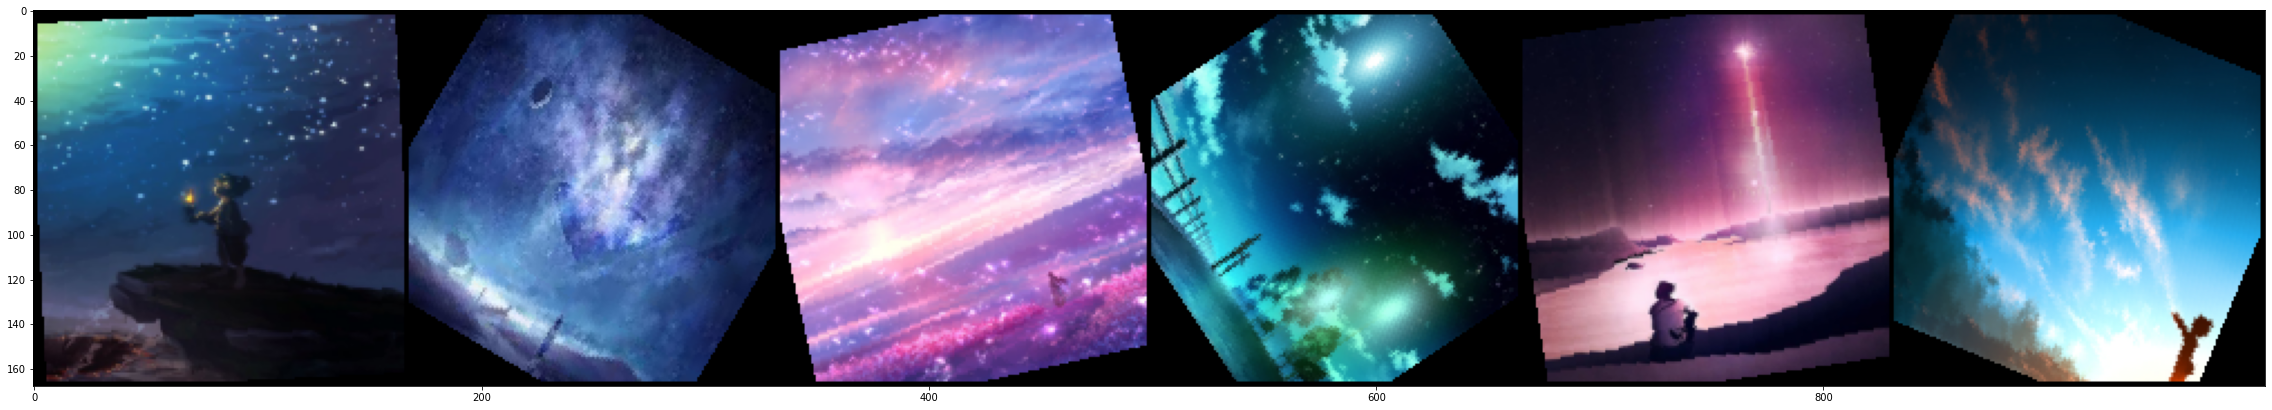

In [53]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))

## Grayscale Image

In [59]:
transform=transforms.Compose([
                              transforms.ToPILImage(),
                              transforms.Resize((164,164)),   
                              transforms.ToTensor(),
                              transforms.Grayscale(num_output_channels=1)  
                              ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


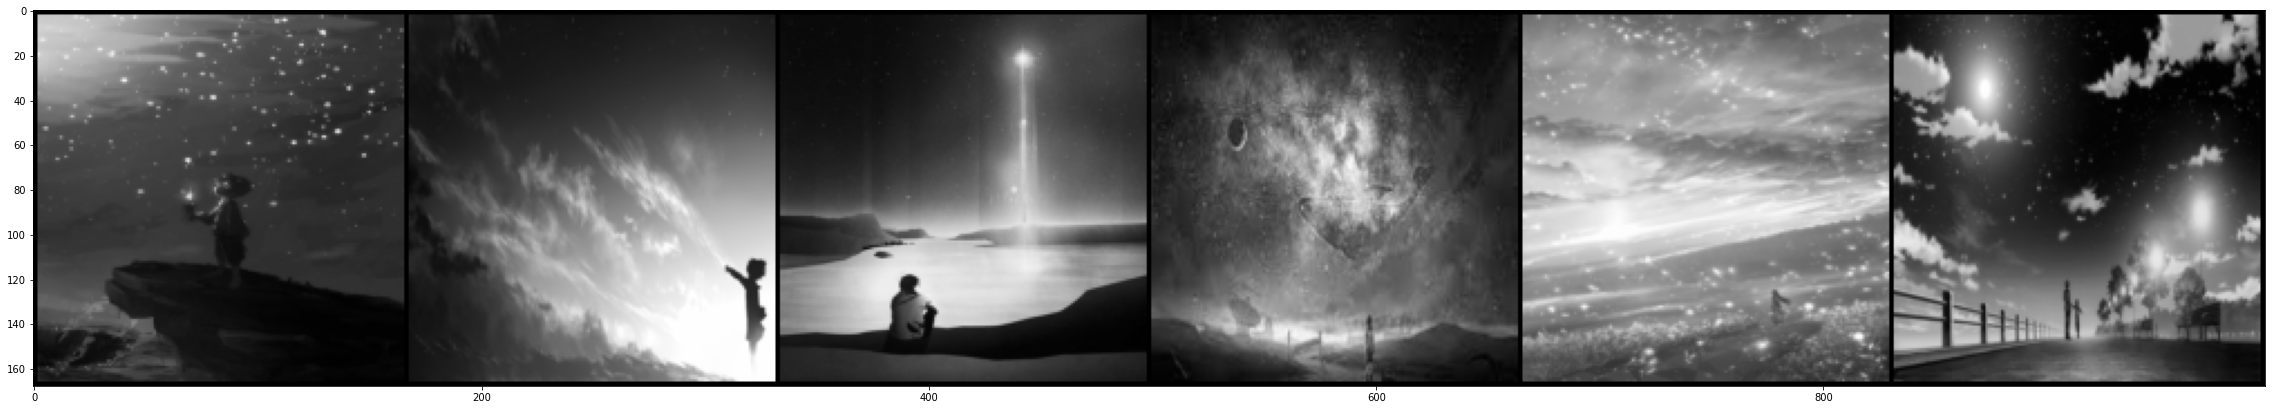

In [60]:
img_dataloader=DataLoader(ImgsDataset(img_list,transform),batch_size=8,shuffle=True)

data=iter(img_dataloader)
show_img(torchvision.utils.make_grid(data.next()))